In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<Axes: xlabel='class', ylabel='count'>

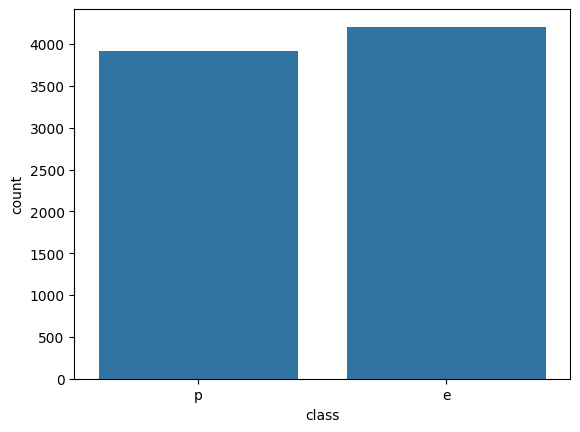

In [5]:
sns.countplot(data=df,x='class')

In [10]:
feats_uni=df.describe().transpose().reset_index().sort_values('unique')

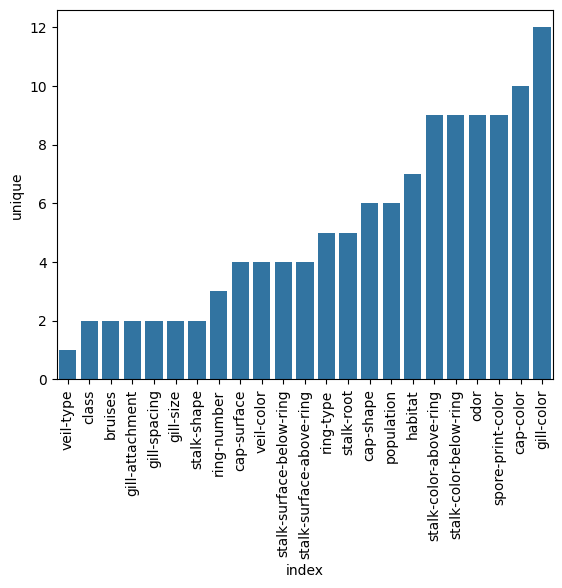

In [13]:
sns.barplot(data=feats_uni,x='index',y='unique')
plt.xticks(rotation=90);

In [14]:
X = df.drop('class',axis=1)

In [17]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [18]:
X = pd.get_dummies(X, drop_first=True)

In [19]:
y = df['class']

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=10,random_state=101)

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
model = AdaBoostClassifier(n_estimators=1)

In [26]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [27]:
from sklearn.metrics import classification_report

In [29]:
predictions = model.predict(X_test)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      0.71      0.83         7
           p       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



<Axes: xlabel='odor', ylabel='count'>

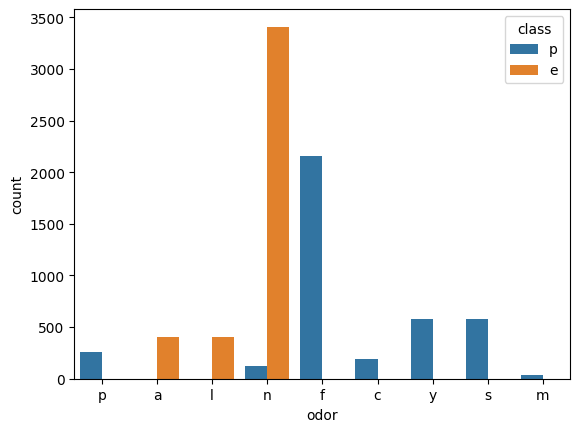

In [32]:
sns.countplot(data=df,x='odor',hue='class')

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    error_rates.append(err)

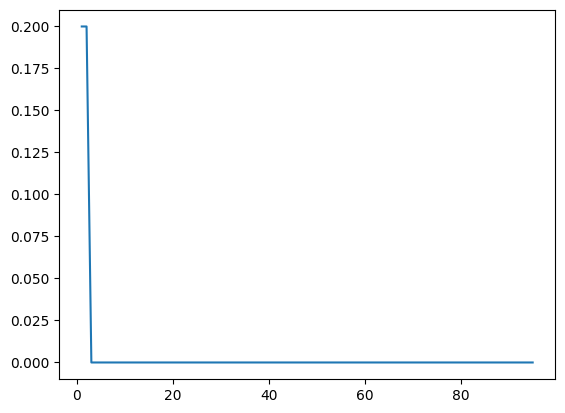

In [36]:
plt.plot(range(1,96),error_rates)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../DATA/mushrooms.csv')    

In [4]:
X = df.drop('class',axis=1)
y = df['class']

In [5]:
X = pd.get_dummies(X,drop_first=True)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = {
    'n_estimators':[50,100],
    'learning_rate':[0.1,0.05,0.2],
    'max_depth':[3,4,5]
}

In [11]:
gb_model = GradientBoostingClassifier()

In [13]:
grid = GridSearchCV(gb_model,param_grid)

In [14]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [16]:
from sklearn.metrics import classification_report,accuracy_score

In [17]:
predictions = grid.predict(X_test)

In [18]:
accuracy_score(predictions,y_test)

0.998769987699877

In [19]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       445
           p       1.00      1.00      1.00       368

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [20]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [21]:
grid.best_estimator_.feature_importances_

array([1.71990251e-04, 7.14837651e-16, 0.00000000e+00, 0.00000000e+00,
       8.22541617e-17, 1.68661908e-03, 6.70235551e-16, 8.20649377e-17,
       0.00000000e+00, 0.00000000e+00, 1.59974504e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.27885148e-17,
       2.38983263e-03, 5.43448959e-02, 1.30525988e-04, 1.45082742e-02,
       2.07370954e-02, 1.43865212e-03, 6.15607813e-01, 3.84602370e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28025380e-02,
       1.11267080e-02, 0.00000000e+00, 1.01601148e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.37717027e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.79051278e-04, 0.00000000e+00, 1.28931801e-01, 5.43593453e-03,
       1.52340584e-02, 1.30746262e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.08321584e-02, 1.20934855e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [22]:
feature_imp = grid.best_estimator_.feature_importances_

In [23]:
imp_feat = pd.DataFrame(
    index=X.columns,
    data=feature_imp,
    columns=['Importance']
)

In [25]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

In [26]:
imp_feat

,Importance
cap-surface_g,0.001687
cap-color_y,0.002390
bruises_t,0.054345
odor_f,0.014508
odor_l,0.020737
odor_m,0.001439
odor_n,0.615608
odor_p,0.003846
gill-spacing_w,0.012803
gill-size_n,0.011127


In [28]:
imp_feat = imp_feat.sort_values('Importance')

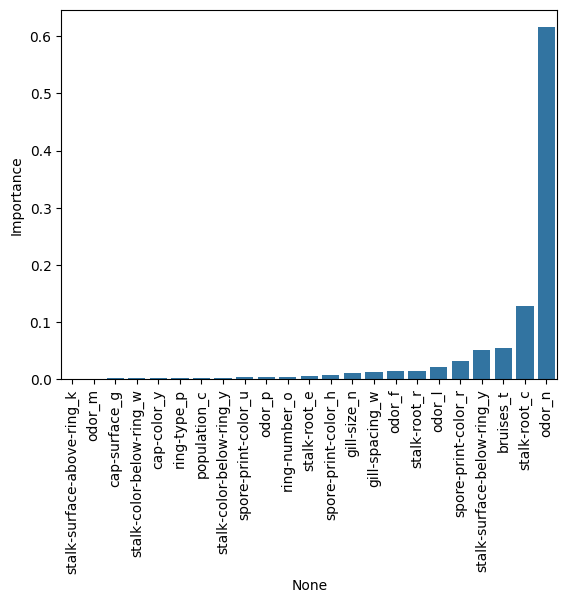

In [30]:
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);